In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1 
from eofs.xarray import Eof

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### For CM2.6 data:

In [2]:
%cd /net2/smg/documents/OMDT/analysis_CM2p6/grids
os = xr.open_dataset('ocean.static.nc')
fs = xr.open_dataset('ocean_grid.nc')
depth=fs['ht'][:,:]

lon=fs['geolon_t']; lat=fs['geolat_t']
# Coriolis is 2Omega sin(phi) where phi is the latitude of the B-grid velocity point, which should be available in hgrid
Coriolis = 2*7.29e-5*np.sin(fs['geolat_c']/360 *2*np.pi);
#dx = fs['dxt']; dy = fs['dyt']; dxy= (dx**2+dy**2)**0.5
#print(fs,os)

%cd /archive/Richard.Slater/CM2.6/CM2.6_A_Control-1860_V03/history
#%ls
u_full = xr.open_dataset('02010101.ocean_minibling_field_u.nc')['u'] #,'02020101.ocean_minibling_field_u.nc'
#u_mean = u_full.mean('time')
#u_prime=u_full-u_mean
print('done part 1')
v_full = xr.open_dataset('02010101.ocean_minibling_field_v.nc')['v']  #,'02020101.ocean_minibling_field_v.nc'
#v_mean = v_full.mean('time')
#v_prime=v_full-v_mean

z = u_full.st_ocean
z_edges  = xr.open_dataset('02020101.ocean_minibling_field_u.nc')['st_edges_ocean']
thickness= z_edges.diff('st_edges_ocean').rename({'st_edges_ocean': 'st_ocean'}).assign_coords({"st_ocean":u_full.st_ocean})

print(thickness)


/net2/smg/documents/OMDT/analysis_CM2p6/grids
/arch2/rds/CM2.6/CM2.6_A_Control-1860_V03/history
done part 1
<xarray.DataArray 'st_edges_ocean' (st_ocean: 50)>
array([ 10.06709957,  10.09290028,  10.12890053,  10.17849922,
        10.24740219,  10.34269714,  10.47480392,  10.6576004 ,
        10.9101944 ,  11.25960541,  11.74169922,  12.40619659,
        13.32000732,  14.57260132,  16.28289795,  18.604599  ,
        21.73239136,  25.90260315,  31.3868103 ,  38.4697876 ,
        47.40710449,  58.35928345,  71.30871582,  85.9883728 ,
       101.85479736, 118.14520264, 134.01159668, 148.69128418,
       161.64074707, 172.59289551, 181.53027344, 188.61315918,
       194.09741211, 198.26745605, 201.39550781, 203.71704102,
       205.42749023, 206.67993164, 207.59399414, 208.25805664,
       208.74047852, 209.08984375, 209.34228516, 209.52539062,
       209.65722656, 209.75244141, 209.82177734, 209.87109375,
       209.90673828, 209.93310547])
Coordinates:
  * st_ocean  (st_ocean) float64 5.0

In [40]:
# %cd /work/eay/CM2.6
# ds = xr.Dataset({'u_full': u_full})
# print('done')
# ds.to_netcdf('u_1year_CM2_1deg.nc', 'w')
# %cd /work/eay/CM2.6
# ds = xr.Dataset({'v_full': v_full})
# print('done')
# ds.to_netcdf('v_1year_CM2_1deg.nc', 'w')

NameError: name 'zl' is not defined

In [36]:
v_full.shape

(73, 50, 200, 360)

### For CM2.5 data:

In [25]:
%cd /work/eay/CM2.6/CM2.5_data
fs = xr.open_dataset('02010101.ocean_grid.nc')
depth=fs['ht'][:,:]

lon=fs['geolon_t']; lat=fs['geolat_t']
u_full = xr.open_dataset('02010101.ocean_bgc_physics_field_u.nc')['u'][:,:,::4,::4] #,'02020101.ocean_bgc_physics_field_u.nc'
v_full = xr.open_dataset('02010101.ocean_bgc_physics_field_v.nc')['v'][:,:,::4,::4] #,'02020101.ocean_bgc_physics_field_v.nc'
#temp_full = xr.open_mfdataset(['02010101.ocean_bgc_physics_field_temp.nc','02020101.ocean_bgc_physics_field_temp.nc'])['temp']
#salt_full = xr.open_mfdataset(['02010101.ocean_bgc_physics_field_salt.nc','02020101.ocean_bgc_physics_field_salt.nc'])['salt']
z = u_full.st_ocean
z_edges  = xr.open_dataset('02010101.ocean_bgc_physics_field_u.nc')['st_edges_ocean']
thickness= z_edges.diff('st_edges_ocean').rename({'st_edges_ocean': 'st_ocean'}).assign_coords({"st_ocean":u_full.st_ocean})

# print(thickness)

/work2/eay/CM2.6/CM2.5_data


### For CM2-1deg data:

In [34]:
%cd /work/eay/CM2.6/CM2_1deg_data
fs = xr.open_dataset('01990101.ocean_grid.nc')
depth=fs['ht'][:,:]

lon=fs['geolon_t']; lat=fs['geolat_t']
u_full = xr.open_dataset('01990101.ocean_bgc_physics_field_u.nc')['u'] #,'02000101.ocean_bgc_physics_field_u.nc'
v_full = xr.open_dataset('01990101.ocean_bgc_physics_field_v.nc')['v'] #,'02000101.ocean_bgc_physics_field_v.nc'
#temp_full = xr.open_mfdataset(['01990101.ocean_bgc_physics_field_temp.nc','02000101.ocean_bgc_physics_field_temp.nc'])['temp']
#salt_full = xr.open_mfdataset(['01990101.ocean_bgc_physics_field_salt.nc','02000101.ocean_bgc_physics_field_salt.nc'])['salt']
z = u_full.st_ocean
z_edges  = xr.open_dataset('01990101.ocean_bgc_physics_field_u.nc')['st_edges_ocean']
thickness= z_edges.diff('st_edges_ocean').rename({'st_edges_ocean': 'st_ocean'}).assign_coords({"st_ocean":u_full.st_ocean})

print(thickness)

/work2/eay/CM2.6/CM2_1deg_data
<xarray.DataArray 'st_edges_ocean' (st_ocean: 50)>
array([ 10.0671,  10.0929,  10.1289,  10.1785,  10.2474,  10.3427,
        10.4748,  10.6576,  10.9102,  11.2596,  11.7417,  12.4062,
        13.32  ,  14.5726,  16.2829,  18.6046,  21.7324,  25.9026,
        31.3868,  38.4698,  47.4071,  58.3593,  71.3087,  85.9884,
       101.8548, 118.1452, 134.0116, 148.6913, 161.6407, 172.5929,
       181.5303, 188.6131, 194.0974, 198.2675, 201.3955, 203.717 ,
       205.4275, 206.68  , 207.594 , 208.258 , 208.7405, 209.0898,
       209.3423, 209.5254, 209.6572, 209.7525, 209.8218, 209.8711,
       209.9067, 209.9331])
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03


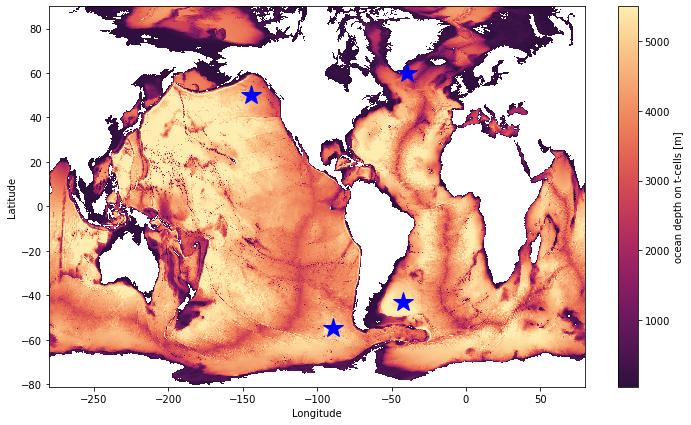

In [7]:
fig=depth.plot(figsize=(12, 7),cmap=cmocean.cm.matter_r)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.colorbar.set_ylabel('Depth (m)')
plt.plot(lon[767,2374],lat[767,2374],'*b',markersize=20)
plt.plot(lon[592,1907],lat[592,1907],'*b',markersize=20)
plt.plot(lon[1824,1354],lat[1824,1354],'*b',markersize=20)
plt.plot(lon[1998,2405],lat[1998,2405],'*b',markersize=20)
plt.show()

In [4]:
u    = u_full[:,:,767,2374]
v    = v_full[:,:,767,2374]
#u = u-u.mean('time') #automatically done in eofs code
#v = v-v.mean('time')

print('done')

#temp = temp_full[:,:,767,2374]  
#salt = salt_full[:,:,767,2374]

done


## Defining EOF solver:

In [8]:
%%time
solver_u = Eof(u)
print('done')
solver_v = Eof(v)

done
CPU times: user 128 ms, sys: 536 ms, total: 664 ms
Wall time: 2min 16s


In [38]:
%%time
eofu = solver_u.eofs(neofs=5)
eofv = solver_v.eofs(neofs=5)

pcsu = solver_u.pcs(npcs=5)
pcsv = solver_v.pcs(npcs=5)

pcsu_s = solver_u.pcs(npcs=5, pcscaling=1)
pcsv_s = solver_v.pcs(npcs=5, pcscaling=1)
eigenvaluesu = solver_u.eigenvalues(neigs=5)
eigenvaluesv = solver_v.eigenvalues(neigs=5)

pvaru = solver_u.varianceFraction(neigs=5)
pvarv = solver_v.varianceFraction(neigs=5)


print(pvaru*100)

<xarray.DataArray 'variance_fractions' (mode: 5)>
array([93.1985    ,  5.925675  ,  0.3818314 ,  0.2375382 ,  0.11197614],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3 4
CPU times: user 13.4 ms, sys: 37 µs, total: 13.4 ms
Wall time: 12.3 ms


In [44]:
u

<xarray.DataArray 'u' (time: 73, st_ocean: 50)>
array([[-0.027566, -0.066615, -0.066744, ..., -0.090662, -0.086117,       nan],
       [-0.173335, -0.209648, -0.214105, ..., -0.20874 , -0.206413,       nan],
       [-0.412349, -0.385445, -0.364475, ..., -0.238344, -0.239761,       nan],
       ...,
       [-0.060214, -0.052303, -0.045926, ..., -0.117192, -0.116796,       nan],
       [-0.031913, -0.084129, -0.097295, ..., -0.11495 , -0.117455,       nan],
       [-0.072189, -0.069631, -0.057026, ..., -0.090728, -0.095381,       nan]],
      dtype=float32)
Coordinates:
    xu_ocean  float64 -42.5
    yu_ocean  float64 -42.99
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 0201-01-03 12:00:00 ... 0201-12-29 12:00:00
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    standard_name:  sea_water_x_velocity

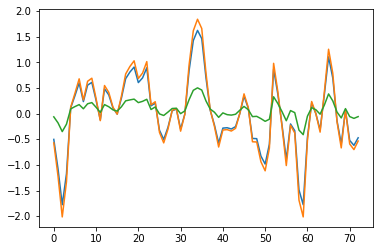

In [40]:
plt.plot(pcsu[:,0]*eigenvaluesu[0])
plt.plot(pcsu_s[:,0]*eigenvaluesu[0])

plt.plot(u[:,10])

Text(0.5, 0, 'Magnitude')

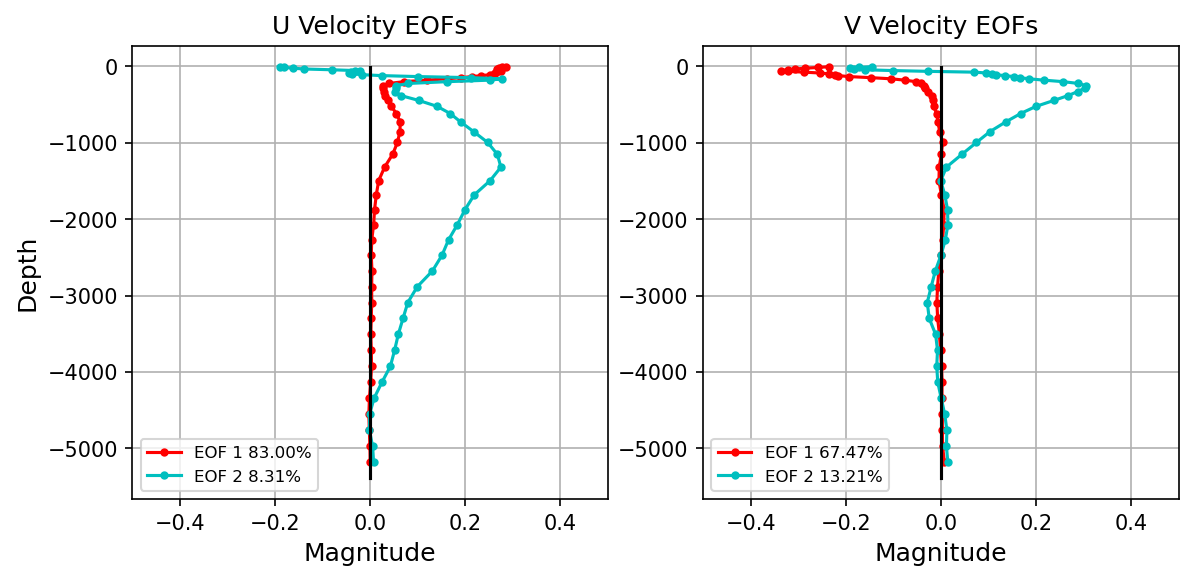

In [7]:
fig = plt.figure(figsize=(9, 4), dpi= 150, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.plot(eofu[0],-eofu.st_ocean,'.-r',label=r'EOF 1 {:1.2f}%'.format(pvaru[0].values*100)) 
plt.plot(eofu[1],-eofu.st_ocean,'.-c',label=r'EOF 2 {:1.2f}%'.format(pvaru[1].values*100))
plt.plot(-eofu.st_ocean*0.0,-eofu.st_ocean,'-k')

#plt.plot(Jake_eofu[:,0],Jake_eofu.z,'-c',label='Jake EOF 1')
#plt.plot(Jake_eofu[:,1],Jake_eofu.z,'-r',label='Jake EOF 2')

plt.grid()
plt.legend(fontsize=8)
#plt.plot([0, 0],[0, -5500],color=[0,0,0])
plt.xlim(-.5,.5)
#plt.ylim(5500, 0);
plt.title('U Velocity EOFs',fontsize=12)
plt.ylabel('Depth',fontsize=12)
plt.xlabel('Magnitude',fontsize=12)
 
plt.subplot(1,2,2)
plt.plot(eofv[0],-eofv.st_ocean,'.-r',label=r'EOF 1 {:1.2f}%'.format(pvarv[0].values*100)) 
plt.plot(eofv[1],-eofv.st_ocean,'.-c',label=r'EOF 2 {:1.2f}%'.format(pvarv[1].values*100))
plt.plot(-eofv.st_ocean*0.0,-eofv.st_ocean,'-k')

#plt.plot(Jake_eofv[:,0],Jake_eofv.z,'-c',label='Jake EOF 1')
#plt.plot(Jake_eofv[:,1],Jake_eofv.z,'-r',label='Jake EOF 2')

plt.grid()
plt.legend(fontsize=8)
#plt.plot([0, 0],[0, -5500],color=[0,0,0])
plt.xlim(-.5,.5)
#plt.ylim(5500, 0);
plt.title('V Velocity EOFs',fontsize=12)
#plt.ylabel('Depth',fontsize=12)
plt.xlabel('Magnitude',fontsize=12)

In [223]:
# %cd /work/eay/CM2.6
# Jake_data = xr.open_dataset('ooi_Argb_CM26_eofs.nc')
# Jake_eofu = Jake_data['eof_u']
# Jake_eofv = Jake_data['eof_v']
# print('done')

In [6]:
# fig = plt.figure(figsize=(4, 4), dpi= 150, facecolor='w', edgecolor='k')


# plt.plot(eofu[0]-0.034,-eofv.st_ocean,'.-r',label=r'EOF 1: {:1.0f}% Variance'.format(50))

# plt.plot(-eofv.st_ocean*0.0,-eofv.st_ocean,'-k')
# #plt.legend(loc='upper left')

# plt.grid()
# plt.xlim(-.2,.2)
# plt.ylim(-5500, 0);
# plt.title('Surface Mode',fontsize=12)
# plt.ylabel('Depth',fontsize=12)
# plt.xlabel('Magnitude',fontsize=12)
